# 2.0.1 Números Factoriales

1. Escriba una función que calcule el factorial de n, con n ∈ N. Calcule los primeros 20 números factoriales.




In [ ]:
def factorial(num:int)->int:
    factorial=1
    for i in range(1,num+1):
        factorial*=i
    return factorial

for i in range(20):
  resultado=factorial(i)
  print("{0}! = {1}".format(i,resultado))

0! = 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
10! = 3628800
11! = 39916800
12! = 479001600
13! = 6227020800
14! = 87178291200
15! = 1307674368000
16! = 20922789888000
17! = 355687428096000
18! = 6402373705728000
19! = 121645100408832000


2. Escriba una función que calcule las variaciones sin repetición de n elemenos tomados de r en r:

a) Calcule de cuantas maneras puedo ubicar 6 carros en 3 estacionamientos

In [ ]:
def variacion(n:int,r:int)->int:
    factorial_n=factorial(n)
    factorial_n_r=factorial(n-r)
    variaciones=factorial_n//factorial_n_r
    return variaciones

variacion(6,3)

120

3. Escriba una función que calcule las combinaciones sin repetición de n elementos tomados de m en m, con n > m.

Calcule cuantos equipos de 11 jugadores puedo formar con 22 jugadores disponibles.
Suponga que:

a) Cualquiera puede ser el arquero.

b) Ya sabemos quién será el arquero.


In [ ]:
def combinacion(n:int,m:int)->int:
    factorial_n=factorial(n)
    factorial_m=factorial(m)
    factorial_n_m=factorial(n-m)
    combinaciones=factorial_n//(factorial_m*factorial_n_m)
    return combinaciones

print("a)",combinacion(22,11))
print("b)",combinacion(21,10))

a) 705432
b) 352716


#2.0.2 Máximos

1. Descargue los datos de: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt Diseñe un algoritmo para encontrar todos los máximos locales en esta serie de datos.

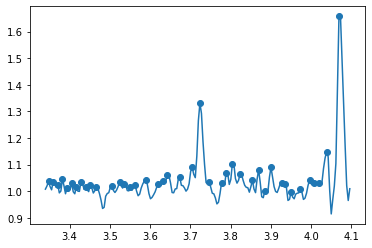

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# El argrelextrema me apareció en internet como una 
# forma de hallar picos en los datos de un array
# https://www.delftstack.com/es/howto/python/find-peaks-in-python/


url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt"
DataFrame = pd.read_csv(url,sep="  ",names=["x","y"],engine='python')
x=np.array(DataFrame["x"])
y=np.array(DataFrame["y"])

coords_list=[]
for i in range(len(x)):
  coords_list.append([x[i],y[i]])

coords=np.array(coords_list)

maximos_locales = argrelextrema(coords[:,1],np.greater)
#La primera entrada es la parte de los datos 
#que va a analizar, en este caso, el eje Y.

#La segunda parte es qué cosa de los datos va 
#a analizar, en este caso, los maximos locales

x_local=coords[maximos_locales][:,0]
y_local=coords[maximos_locales][:,1]
plt.plot(x,y)
plt.scatter(x_local,y_local)

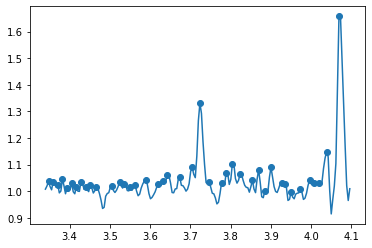

In [ ]:
#Otra forma más intuitiva de hacerlo es simplemente que el for
#loop compare los datos que estan al lado de un dato especifico

#El primer dato y el último dato no se comparan con los otros
#del alrededor, el recorrido inicia desde el segundo dato y
#termina hasta el penúltimo dato (de manera que solo cuenten
#los picos de la gráfica)

maximos_locales = []

for i in range(1,len(coords)-1):
  if coords[i-1][1]<coords[i][1]>coords[i+1][1]:
    maximos_locales.append(i)

maximos_locales

x_maximo=coords[maximos_locales][:,0]
y_maximo=coords[maximos_locales][:,1]

plt.plot(x,y)
plt.scatter(x_local,y_local)

#2.0.3 Sucesión de Fibonnaci

1. Encuentre los primeros 20 terminos de esta sucesión.

In [ ]:
n=20
func=np.zeros(n)
func[0]=0
func[1]=1

def Fibonnaci(f1,f2):
    f=f1+f2
    return f

for i in range(2,n):
    func[i]=Fibonnaci(func[i-1],func[i-2])

sum=0
for i in func:
  sum+=1
  print("Digito {0}: {1}".format(sum, int(i)))

Digito 1: 0
Digito 2: 1
Digito 3: 1
Digito 4: 2
Digito 5: 3
Digito 6: 5
Digito 7: 8
Digito 8: 13
Digito 9: 21
Digito 10: 34
Digito 11: 55
Digito 12: 89
Digito 13: 144
Digito 14: 233
Digito 15: 377
Digito 16: 610
Digito 17: 987
Digito 18: 1597
Digito 19: 2584
Digito 20: 4181


2. Graficar la sucesión de Fibonnaci.

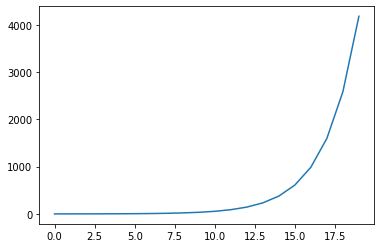

In [ ]:
scale=np.arange(0,n,1)
plt.plot(scale,func)

3. Usando la sucesión de números de Fibonnaci, calcular el número aureo y comparar con el valor exacto

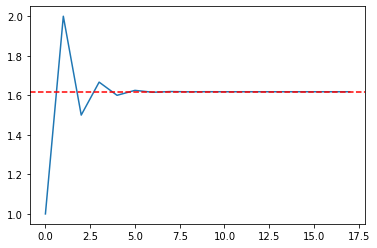

In [ ]:
aureo=np.array([])
for i in range(1, n-1):
  aureo=np.append(aureo,func[i+1]/func[i])
num_aureo=(1+np.sqrt(5))/2

plt.plot(scale[:len(aureo)],aureo)
plt.axhline(y=num_aureo, color="red", linestyle="--")

#2.0.8 Choques de duración finita

Utilice el template de la clase partícula vista en clase para simular una colisión de duración finita. Para la interacción de las dos partículas use la siguiente fuerza de contacto (Landau-Lifshitz volumen. Usar K = 100 N/m3, m = 1 kg y R1 = R2 = 2 m

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

class Particle:
    
    def __init__(self,r0,v0,a0,t,f0,m=1,radius=2,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.f = f0
        self.m = m
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        self.F = np.zeros_like(self.R)
        
        self.radius = radius
        
    def Evolution(self,i,p):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetAceleration(i)
        
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetForce(self,i,p):
        if np.linalg.norm(self.r-p.r) <= self.radius + p.radius:
            a = 1*((np.linalg.norm(self.r-p.r)**3) * (self.r-p.r) / np.linalg.norm(self.r-p.r))
            self.f = a
            self.F[i] = self.f
            self.a = self.f/self.m
            self.A[i] = self.a
        else:
            self.f = 0
            self.F[i] = self.f
            self.a = 0
            self.A[i] = self.a
    
    def SetAceleration(self,i):
        self.A[i] = self.F[i]/self.m
        self.A[i] = self.a
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetForce(self,i):
        return self.F[i]
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    

    def CheckLimits(self,Limits):
        
        for i in range(2):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]

def RunSimulation1(t, Wall):
    r0 = np.array([-15., 1])
    v0 = np.array([10., 0.])
    a0 = np.array([0., 0])
    f0 = np.array([0., 0.])
    
    r1 = np.array([0., -1.5])
    v1 = np.array([0., 0.])
    a1 = np.array([0., 0])
    f1 = np.array([0., 0.])
    
    p1 = Particle(r0, v0, a0, t, f0)
    p2 = Particle(r1, v1, a1, t, f1)
    Wall_ = Wall.copy()
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        
        p1.SetForce(it, p2)
        p2.SetForce(it, p1)
        p1.Evolution( it,p2)
        p2.Evolution(it,p1)
        p1.CheckLimits(Wall_)
        p2.CheckLimits(Wall_)
        
   
    
    return p1,p2



# Region
Limits = np.array([[-20.,20.],[-20.,20.]])

dt = 0.05
tmax = 10
t = np.arange(0.,tmax,dt)
Particles = RunSimulation1(t,Limits)[0]
Particles1 = RunSimulation1(t,Limits)[1]

scale = 1

t = t[::scale]

#Particles1.GetPosition(8)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    
    x = Particles.GetPosition(scale)[i,0]
    y = Particles.GetPosition(scale)[i,1]
    vx = Particles.GetVelocity(scale)[i,0]
    vy = Particles.GetVelocity(scale)[i,1]
    
    circle = plt.Circle((x,y),Particles.radius, fill=True, color='k')
    ax.add_patch(circle)
    
    ax.arrow(x,y,vx,vy,color='r',head_width=0.2,length_includes_head=True)
             
    x1 = Particles1.GetPosition(scale)[i,0]
    y1 = Particles1.GetPosition(scale)[i,1]
    vx1 = Particles1.GetVelocity(scale)[i,0]
    vy1 = Particles1.GetVelocity(scale)[i,1]
    
    circle = plt.Circle((x1,y1),Particles1.radius, fill=True, color='k')
    ax.add_patch(circle)
    
    ax.arrow(x1,y1,vx1,vy1,color='r',head_width=0.2,length_includes_head=True)  
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)

Running simulation: 100%|██████████| 200/200 [00:00<00:00, 3318.67 Steps/s]


<IPython.core.display.Javascript object>

# 3.7 Ejercicios de Derivadas

Demuestre que el operador D^4f está dada por:

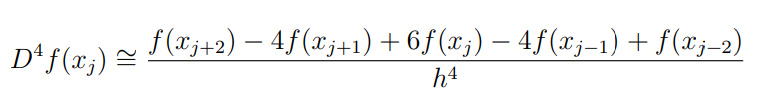

Para este operador, ¿cuál es el orden O(h^k) de la aproximación?

ESTE PUNTO FUE REALIZADO EN EL PDF QUE SE ENVIÓ JUNTO A ESTE ARCHIVO DE PYTHON

Calcular el campo de velocidades cerca de la superficie de un cilindro de radio R = 2 cm

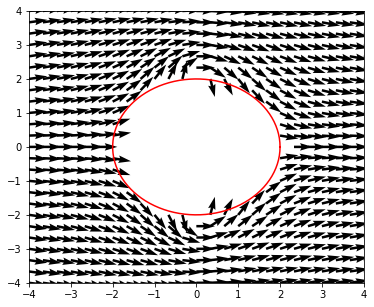

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n=25
R=2
V=2
x = np.linspace(-4,4,n)
y = np.linspace(-4,4,n)
X,Y = np.meshgrid(x,y)

def FlowPotencial(x, y, V=2, R=2):
  return V*x*(1-(R**2)/(x**2+y**2))

def CentralDerivative_x(f,x,y,h=0.001):
  return (f(x+h,y)-f(x-h,y))/(2*h)

def CentralDerivative_y(f,x,y,h=0.001):
  return (f(x,y+h)-f(x,y-h))/(2*h)

Vx = np.zeros((n,n))
Vy = np.zeros((n,n))

for i in range(n):
  for j in range(n):
      if np.sqrt(x[i]**2 + y[j]**2) > R:
          Vx[i,j] = CentralDerivative_x(FlowPotencial,x[i],y[j])
          Vy[i,j] = -CentralDerivative_y(FlowPotencial,x[i],y[j])

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

for i in range(n):
    for j in range(n):
        ax.quiver(x[i],y[j],Vx[i,j],Vy[i,j])

angulo = np.linspace(0, 2*np.pi,100)
x1 = 2 * np.cos(angulo)
y1 = 2 * np.sin(angulo)

plt.plot(x1, y1, color="red")
ax.streamplot(X,Y,Vx,Vy, density=0)

import warnings
warnings.filterwarnings("ignore")

#3.10 Raíces de Polinomios

Calcular todas las raíces reales de:

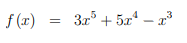

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

def Function(x):
    return 3*x**5+5*x**4-x**3

x = np.linspace(-2,2,1000)
y = Function(x)

def CentralDerivative(f,x,h=1e-10):
    return (f(x+h)-f(x-h))/(2*h)

def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-5):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        try:
            xn1 = xn - f(xn)/df(f,xn)
            error = np.abs(f(xn)/df(f,xn))
        except ZeroDivisionError:
            print('Division por cero')
        it += 1
        xn = xn1
    return xn

Roots = np.array([])
tolerancia = 4

for i in x:
  root = GetNewtonRaphson(Function,CentralDerivative,i)
  root = np.round(root, tolerancia)
  if root not in Roots:
    Roots = np.append(Roots,root)

Roots.sort()
print(Roots)

[-1.8471  0.      0.1805]
